In [73]:
from econml.dml import LinearDML
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, ElasticNetCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from model_selection import SearchEstimatorList
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [6]:
data_df = pd.read_csv("abalone.csv")
col =  ["Sex", "Length", "Diameter", "Height", "Whole_weight","Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
data_df.columns = col
data_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [24]:
feature_col = ["Length", "Diameter", "Height"]
outcome_col = ["Rings"]
treatment_col = ["Whole_weight"]
X = data_df[feature_col]
Y = data_df[outcome_col].values.reshape(-1, 1)
T = data_df[treatment_col].values.reshape(-1, 1)

X, X_val, T, T_val, Y, Y_val = train_test_split(X, T, Y, train_size=0.6, shuffle=True, random_state=123)
X_val, X_test, T_val, T_test, Y_val, Y_test = train_test_split(X_val, T_val, Y_val, train_size=.5, shuffle=True, random_state=123)

In [59]:
#Find the best model_y
alpha = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

models_y = [
('Linear Regression', ElasticNetCV(alphas=alpha), {}),
('Forest', RandomForestRegressor(), 
    {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]}),
('gbf', GradientBoostingRegressor(),
    {"n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]}),
('nnet', MLPRegressor(), 
    {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]})
]

best_model_y = None
best_mse_y = None

for name, model, param_grid in models_y:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X, Y.ravel())
    best_params = grid_search.best_params_
    current_best_model = grid_search.best_estimator_
    current_best_score = grid_search.best_score_
    predictions = current_best_model.predict(X)
    current_best_mse = mean_squared_error(Y, predictions)

    if best_mse_y is None or current_best_mse > best_mse_y:
        best_model_y = current_best_model
        best_mse_y = current_best_mse
    
print(best_model_y)
coef = best_model_y.coef_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[i]:.3f}")

ElasticNetCV(alphas=[0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20])
Length: 2.370
Diameter: 11.713
Height: 10.925


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [56]:
#Find the best model_t
models_t = [
('Linear Regression', ElasticNetCV(alphas=alpha), {}),
('Forest', RandomForestRegressor(), 
    {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]}),
('gbf', GradientBoostingRegressor(),
    {"n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]}),
('nnet', MLPRegressor(), 
    {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]})
]

best_model_t = None
best_mse_t = None

for name, model, param_grid in models_t:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X, T.ravel())
    best_params = grid_search.best_params_
    current_best_model = grid_search.best_estimator_
    current_best_score = grid_search.best_score_
    predictions = current_best_model.predict(X)
    current_best_mse = mean_squared_error(T, predictions)

    if best_mse_t is None or current_best_mse > best_mse_t:
        best_model_t = current_best_model
        best_mse_t = current_best_mse

print(best_model_t)
coef = best_model_t.coef_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[i]:.3f}")

ElasticNetCV(alphas=[0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20])
Length: 2.062
Diameter: 1.732
Height: 0.729


In [61]:
est = LinearDML(model_y='auto', model_t='auto', random_state=123)
est.fit(Y.ravel(), T.ravel(), X=X, W=None)
coef = est.coef_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[i]:.3f}")
te_pred = est.effect(X_test)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8983913642305197, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9946064824125642, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9743184219314571, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9393865603578888, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9034830611835787, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.868487265701333, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.697147757173298, tolerance: 0.99609940119

Length: 0.564
Diameter: -1.555
Height: 15.161


Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.828771860683446, tolerance: 1.1570811377245516
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.884964117870368, tolerance: 1.1570811377245516
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.575640852022843, tolerance: 1.1570811377245516


In [62]:
#Call the linearDML class with the best models on Y and T
est1 = LinearDML(model_y=best_model_y, model_t=best_model_t, random_state=123)
est1.fit(Y.ravel(), T.ravel(), X=X, W=None)
coef = est.coef_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[i]:.3f}")
te_pred1 = est.effect(X_test)

Length: 0.564
Diameter: -1.555
Height: 15.161


In [63]:
est2 = LinearDML(model_y='auto', model_t=best_model_t, random_state=123)
est2.fit(Y.ravel(), T.ravel(), X=X, W=None)
coef = est.coef_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[i]:.3f}")
te_pred2 = est2.effect(X_test)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8983913642305197, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9946064824125642, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9743184219314571, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9393865603578888, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9034830611835787, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.868487265701333, tolerance: 1.0384425574425573
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.697147757173298, tolerance: 0.99609940119

Length: 0.564
Diameter: -1.555
Height: 15.161


In [66]:
est3 = LinearDML(model_y=best_model_y, model_t='auto', random_state=123)
est3.fit(Y.ravel(), T.ravel(), X=X, W=None)
te_pred3 = est3.effect(X_test)

In [64]:
score={}
score["LinearDML with auto first-stage models"] = est.score(Y_test, T_test, X_test)
score["LinearDML with best first-stage models through Grid search"] = est1.score(Y_test, T_test, X_test)
score["LinearDML with auto model_y and model_t through Grid search"] = est2.score(Y_test, T_test, X_test)
score["LinearDML with model_y through Grid search and auto model_t"] = est3.score(Y_test, T_test, X_test)
score

{'LinearDML with auto first-stage models': 6.406749000702979,
 'LinearDML with best first-stage models through Grid search': 6.631840818288597,
 'LinearDML with auto model_y and model_t through Grid search': 6.4695172681560384,
 'LinearDML with model_y through Grid search and auto model_t': 6.5934395992278105}

In [67]:
print("best model selected by score: ",min(score,key=lambda x: score.get(x)))

best model selected by score:  LinearDML with auto first-stage models


In [68]:
mse_te = {}
mse_te['LinearDML with auto first-stage models'] = np.mean((Y_test - te_pred)**2)
mse_te['LinearDML with best first-stage models through Grid search'] = np.mean((Y_test - te_pred1)**2)
mse_te['LinearDML with auto model_y and model_t through Grid search'] = np.mean((Y_test - te_pred2)**2)
mse_te['LinearDML with auto model_y through Grid search and auto model_t'] = np.mean((Y_test - te_pred3)**2)
mse_te

{'LinearDML with auto first-stage models': 94.3343047050402,
 'LinearDML with best first-stage models through Grid search': 94.3343047050402,
 'LinearDML with auto model_y and model_t through Grid search': 99.15599470328651,
 'LinearDML with auto model_y through Grid search and auto model_t': 110.77904903004085}

In [69]:
print("best model selected by MSE of TE: ", min(mse_te, key=lambda x: mse_te.get(x)))

best model selected by MSE of TE:  LinearDML with auto first-stage models


In [102]:
# print(T_test)
print(list(X_test[T_test <= 1]['Height']), type(X_test[T_test <= 1]['Height']))
X_test[T_test > 1]['Height']

[0.12, 0.14, 0.16, 0.095, 0.09, 0.13, 0.14, 0.1, 0.07, 0.115, 0.075, 0.1, 0.14, 0.13, 0.15, 0.125, 0.1, 0.07, 0.12, 0.14, 0.12, 0.14, 0.065, 0.09, 0.095, 0.135, 0.14, 0.06, 0.16, 0.165, 0.145, 0.12, 0.11, 0.11, 0.12, 0.11, 0.15, 0.085, 0.14, 0.155, 0.13, 0.1, 0.125, 0.075, 0.14, 0.145, 0.12, 0.155, 0.13, 0.09, 0.13, 0.16, 0.125, 0.135, 0.06, 0.155, 0.075, 0.14, 0.14, 0.105, 0.13, 0.085, 0.16, 0.165, 0.125, 0.13, 0.05, 0.09, 0.17, 0.125, 0.065, 0.115, 0.04, 0.055, 0.06, 0.095, 0.165, 0.135, 0.07, 0.14, 0.09, 0.12, 0.135, 0.15, 0.075, 0.12, 0.11, 0.165, 0.15, 0.13, 0.16, 0.125, 0.095, 0.1, 0.095, 0.135, 0.075, 0.09, 0.16, 0.055, 0.14, 0.08, 0.12, 0.08, 0.12, 0.105, 0.055, 0.105, 0.07, 0.135, 0.105, 0.1, 0.125, 0.155, 0.095, 0.13, 0.15, 0.145, 0.095, 0.165, 0.095, 0.06, 0.14, 0.14, 0.17, 0.12, 0.065, 0.11, 0.09, 0.095, 0.085, 0.12, 0.16, 0.14, 0.1, 0.105, 0.16, 0.14, 0.145, 0.11, 0.125, 0.1, 0.08, 0.07, 0.11, 0.16, 0.09, 0.125, 0.125, 0.07, 0.1, 0.095, 0.185, 0.13, 0.15, 0.155, 0.135, 0.0

876     0.150
4020    0.195
2538    0.205
2276    0.180
1754    0.180
        ...  
1364    0.170
3713    0.185
309     0.190
1006    0.150
3000    0.165
Name: Height, Length: 288, dtype: float64

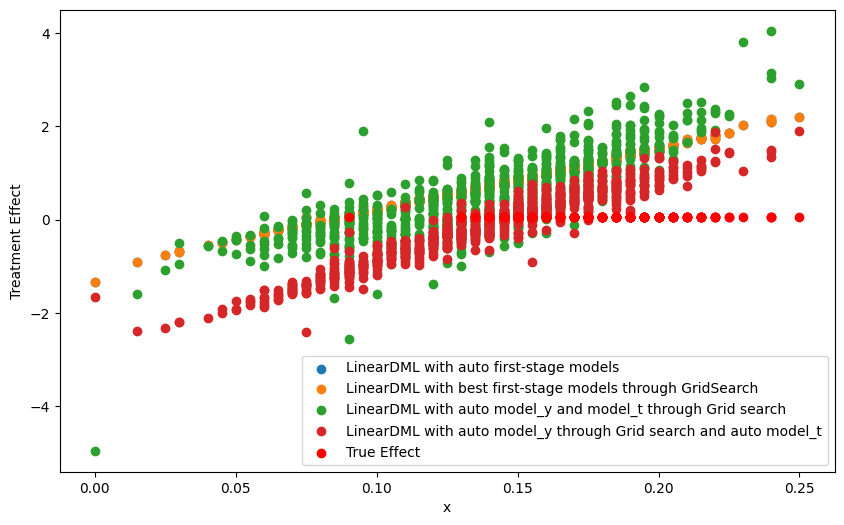

In [109]:
#Plot the graph
plt.figure(figsize=(10,6))
plt.scatter(X_test['Height'], te_pred, label='LinearDML with auto first-stage models')
plt.scatter(X_test['Height'], te_pred1, label='LinearDML with best first-stage models through GridSearch')
plt.scatter(X_test['Height'], te_pred2, label='LinearDML with auto model_y and model_t through Grid search')
plt.scatter(X_test['Height'], te_pred3, label='LinearDML with auto model_y through Grid search and auto model_t')
te_true = X_test[T_test <= 1]['Height'].mean() - X_test[T_test > 1]['Height'].mean()
plt.scatter(X_test[T_test > 1]['Height'], np.zeros_like(X_test[T_test > 1]['Height']) - te_true, color='red', label='True Effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.show()